## Sampling Error

Sampling error is the difference in statistics (sample information) and the actually population parameters.

`sampling error = parameter - statistic`

### Task One

Given the data wnba.csv in the folder data.

The dataset is about basketball players in the WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the 2016-2017 season.

Explore the dataset.

+ Print the first five rows using DataFrame.head() and the last five rows with DataFrame.tail().
+ Find the number of rows and columns using DataFrame.shape.
+ Learn about each column from the documentation. You can also find useful documentation in this glossary and on WNBA's official page.

Take one measure of the sampling error.

+ Use the Games Played column to find the maximum number of games played by a player in the 2016-2017 season. The dataset contains all the players who played at least one game, so it's a population relative to our question. Find this parameter, and assign the result to a variable named parameter.
+ Using the `DataFrame.sample()` method, randomly sample 30 players from the population, and assign the result to a variable named sample.
+ When calling `Series.sample()`, use the argument random_state = 1. This makes your results reproducible, and it helps us with the answer-checking (we'll discuss this on the next screen).
+ Find the maximum number of games using the sample, and assign the result to a variable named statistic.
+ Measure the sampling error, and assign the result to a variable named sampling_error.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

path = "data/wnba.csv"

wnba = pd.read_csv(path)

In [3]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [4]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [5]:
wnba.shape

(143, 32)

the dataset has 143 rows and 32 columns

Maximum number of games played in the whole dataset

In [6]:
parameter = wnba['Games Played'].max()

Generating a random sample of games player for 30 players

In [7]:
sample = wnba['Games Played'].sample(30, random_state=1)

Sample maximum number of games played

In [8]:
statistic = sample.max()

The sampling error is the difference between the two

In [10]:
sampling_error = parameter - statistic

sampling_error

2

## Random Sampling

In sampling we want to minimize the sampling error as much as possible by determining a representative sample.
Sampling error decreases as the sample representativity increases.

![Sampling error decreases with representativity](img/s1m1_representativity.svg)


### Visualization of Simple Random Sampling Using Python


Using simple random sampling, take 100 samples of 10 values each from our WNBA data set, and for each sample, measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop, do the following:

+ Sample 10 values from the PTS column.
+ Compute the mean of this sample made of 10 values from the PTS column, and append the result to a list.
+ To make your results reproducible, vary the random_state parameter of the sample() method with values between 0 and 99. For the first iteration of the for loop, random_state should equal 0, for the second iteration should equal 1, for the third should equal 2, and so on.



In [14]:
sample_means = []

In [13]:
population_mean = wnba['PTS'].mean()

In [15]:
for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    sample_means.append(sample.mean())


In [18]:
sample_means = pd.Series(sample_means)
sample_means.mean()

187.80499999999995



Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.

+ Using `plt.scatter()`, display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.
+ Using `plt.axhline()`, draw a horizontal line that represents the average number of points for the population.



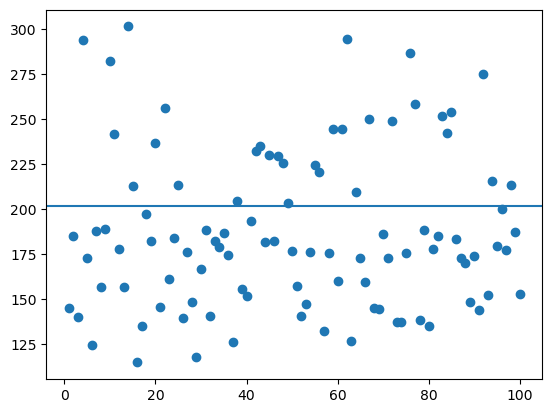

In [19]:
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean)